In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [4]:
df = pd.read_csv("train.csv" , usecols=["Age" , "Fare" ,"Survived"])

In [5]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [7]:
# dropping missing values 
df.dropna(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      714 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 22.3 KB


In [10]:
X = df[["Age", "Fare"]]
y = df["Survived"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [14]:
X_train.head(3)

,Age,Fare
619,26.0,10.5000
622,20.0,15.7417
72,21.0,73.5000


In [15]:
clf = DecisionTreeClassifier()

In [16]:
clf.fit(X_train , y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [17]:
y_pred = clf.predict(X_test)

In [18]:
accuracy_score(y_test , y_pred)

0.5594405594405595

In [19]:
np.mean(cross_val_score(DecisionTreeClassifier() , X,y, cv=5,scoring='accuracy' ))

0.6190485570767261

## binning

In [57]:
kbin_age = KBinsDiscretizer(
    n_bins=15,
    strategy="quantile",
    encode="ordinal",
    quantile_method="averaged_inverted_cdf"
)

kbin_fare = KBinsDiscretizer(
    n_bins=15,
    strategy="quantile",
    encode="ordinal",
    quantile_method="averaged_inverted_cdf"
)

In [58]:
preprocess = ColumnTransformer(
    transformers=[
        ("age_bin", kbin_age, ["Age"]),
        ("fare_bin", kbin_fare, ["Fare"])
    ],
    remainder="drop"
)

In [59]:
pipe = Pipeline([
    ("prep", preprocess),
    ("model", DecisionTreeClassifier(random_state=42))
])

In [62]:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'transform_input', 'verbose', 'prep', 'model', 'prep__force_int_remainder_cols', 'prep__n_jobs', 'prep__remainder', 'prep__sparse_threshold', 'prep__transformer_weights', 'prep__transformers', 'prep__verbose', 'prep__verbose_feature_names_out', 'prep__age_bin', 'prep__fare_bin', 'prep__age_bin__dtype', 'prep__age_bin__encode', 'prep__age_bin__n_bins', 'prep__age_bin__quantile_method', 'prep__age_bin__random_state', 'prep__age_bin__strategy', 'prep__age_bin__subsample', 'prep__fare_bin__dtype', 'prep__fare_bin__encode', 'prep__fare_bin__n_bins', 'prep__fare_bin__quantile_method', 'prep__fare_bin__random_state', 'prep__fare_bin__strategy', 'prep__fare_bin__subsample', 'model__ccp_alpha', 'model__class_weight', 'model__criterion', 'model__max_depth', 'model__max_features', 'model__max_leaf_nodes', 'model__min_impurity_decrease', 'model__min_samples_leaf', 'model__min_samples_split', 'model__min_weight_fraction_leaf', 'model__monotonic_cst', 'model__random_sta

In [63]:
scores = cross_val_score(pipe, X, y, cv=5, scoring="accuracy")
np.mean(scores)

0.6387373190190091

In [65]:
pipe.fit(X_train, y_train)
y_pred3 = pipe.predict(X_test)

In [66]:
accuracy_score(y_test,y_pred3)

0.6363636363636364

In [68]:
## applying GridSearcHCV

In [70]:
kbin_age = KBinsDiscretizer(strategy = "quantile" , encode = "ordinal")
kbins_fare = KBinsDiscretizer(strategy = "kmeans" , encode="ordinal")

In [77]:
preprocess = ColumnTransformer(
    transformers = [
    ("age_bin", kbin_age , ["Age"]),
    ("fare_bin" , kbins_fare , ["Fare"])
])

In [83]:
pipe = Pipeline([
    ("preprocess",preprocess) ,
    ("model" , DecisionTreeClassifier(random_state=42))
])

In [84]:
param_grid = {
    "preprocess__age_bin__n_bins": [3, 5, 8, 10],
    "preprocess__fare_bin__n_bins": [3, 5, 8, 10]
}

In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
grid  = GridSearchCV(estimator = pipe , param_grid = param_grid,
               cv=5 , scoring='accuracy' , n_jobs = -1 )

In [87]:
grid.fit(X,y)

C:\Users\diwan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(


,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'preprocess__age_bin__n_bins': [3, 5, ...], 'preprocess__fare_bin__n_bins': [3, 5, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('age_bin', ...), ('fare_bin', ...)]"


In [88]:
pipe.named_steps

{'preprocess': ColumnTransformer(transformers=[('age_bin', KBinsDiscretizer(encode='ordinal'),
                                  ['Age']),
                                 ('fare_bin',
                                  KBinsDiscretizer(encode='ordinal',
                                                   strategy='kmeans'),
                                  ['Fare'])]),
 'model': DecisionTreeClassifier(random_state=42)}

In [89]:
grid.best_score_

0.6821432089037722

In [90]:
grid.best_params_

{'preprocess__age_bin__n_bins': 8, 'preprocess__fare_bin__n_bins': 8}

In [97]:
def plot_titanic_binning_subplot(csv_path,strategy, n_bins):
    df = pd.read_csv(csv_path, usecols=["Age", "Fare"]).dropna()

    features = {
        "Age": df["Age"].values.reshape(-1, 1),
        "Fare": df["Fare"].values.reshape(-1, 1)
    }

    for feature_name, values in features.items():

        kbin = KBinsDiscretizer(
            n_bins=n_bins,
            strategy=strategy,
            encode="ordinal"
        )
        binned_values = kbin.fit_transform(values)

        fig, axes = plt.subplots(1, 2, figsize=(12, 4))

        # BEFORE
        axes[0].hist(values, bins=30)
        axes[0].set_title(f"{feature_name} - Before Binning")
        axes[0].set_xlabel(feature_name)
        axes[0].set_ylabel("Count")

        # AFTER
        axes[1].hist(binned_values, bins=n_bins)
        axes[1].set_title(f"{feature_name} - After {strategy.capitalize()} Binning")
        axes[1].set_xlabel(f"{feature_name} Bin")
        axes[1].set_ylabel("Count")

        plt.tight_layout()
        plt.show()


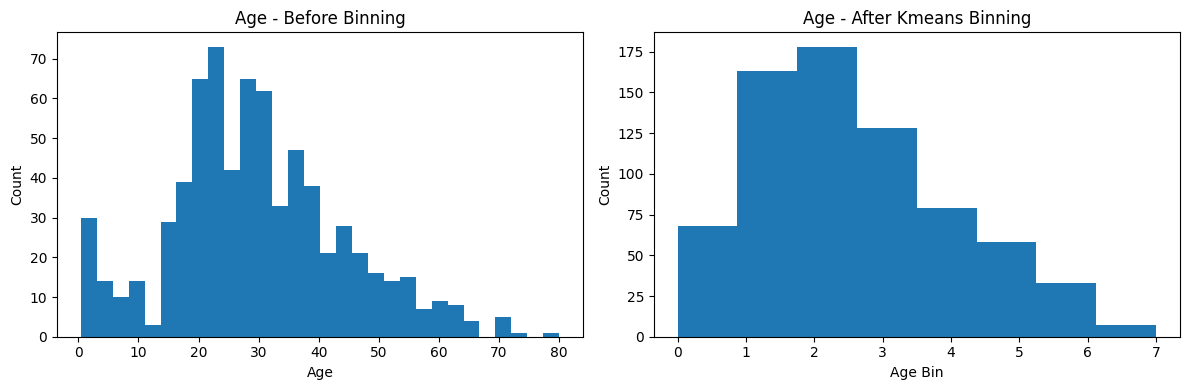

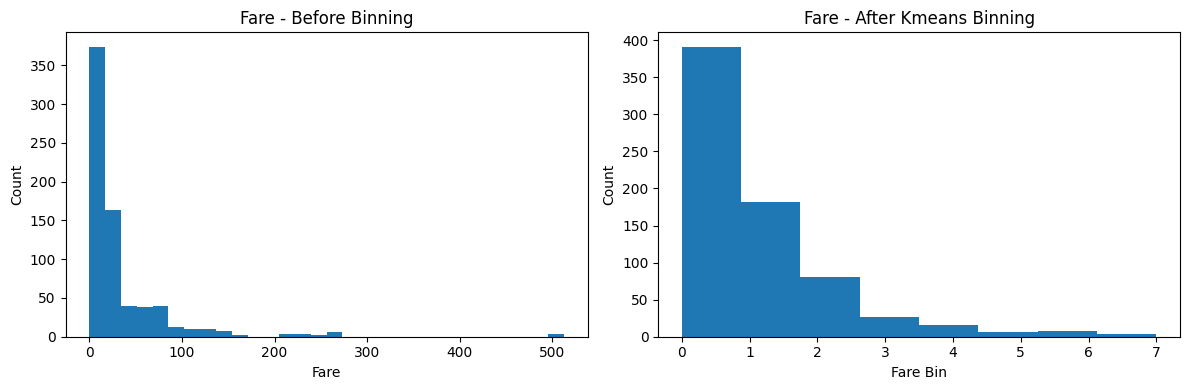

In [100]:
plot_titanic_binning_subplot("train.csv","kmeans",8)